# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al segundo proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal Properati. El objetivo en este caso es continuar con la limpieza de datos y avanzar en remover valores faltantes y remover outliers. Por otro lado, vamos a agregar nuevos atributos basados en los datos.

* PARTE A - Transformación de Datos
* PARTE B - Modelos Avanzados
* PARTE C - Interpretación de modelos


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

### Consigna

En este proyecto profundizarás lo desarrollado en el proyecto 01 (Primer modelo de Machine Learning). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

* ImageDetección y eliminación de Outliers

* Encoding

* ImageImputación de valores faltantes

* Escalado de datos

* ImageGeneración de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

* ImageVuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

PARTE B - Modelos Avanzados

* Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

* Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

* Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

* ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

* ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

### DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

### Checklist de evaluación

Sugerencias para desarrollar el proyecto:

Este proyecto no cuenta con mínimos entregables indicados en la consigna, pero ten en cuenta lo siguiente: en la Parte A debes implementar al menos tres de las transformaciones de datos propuestas. en la Parte B, al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando ). en la Parte C, debes responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu proyecto!

La resolución del proyecto te puede enfrentar a pequeños desafíos que no trabajamos durante los encuentros. Es importante que desarrolles la capacidad de resolverlos. Para ello, consulta las bitácoras, las referencias, los notebooks vistos en clase, la documentación de la librería y, sobre todo, googlea .

Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores. Además, asegúrate de cumplir con las siguientes condiciones (son las que los/as evaluadores/as tendrán en consideración al momento de corregir tu trabajo):

PARTE A - Transformación de Datos

Debes justificar por qué creés que las transformaciones elegidas aplican en este dataset.

Debes re entrenar un modelo del Proyecto 01 y comparar su desempeño con el modelo obtenido en el Proyecto 01.

PARTE B - Modelos Avanzados

En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno.

PARTE C - Interpretación de modelos

Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

Es muy importante que analices los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?

Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías?

---

### Importamos los datos y los guardamos en un dataframe

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
# load the dataset
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

---

# Parte A - Transformación de datos

In [309]:
df.shape 

(146660, 19)

In [310]:
df.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [311]:
df["tipos_de_propiedades"] = df.property_type
df["superficie_total"] = df.surface_total
df["superficie_cubierta"] = df.surface_covered 
df["precios"] = df.price 
df["país"] = df.l1
df["región"] = df.l2
df["barrio"] = df.l3
df["habitaciones"] = df.rooms
df["baños"] = df.bathrooms
df["dormitorios"] = df.bedrooms
df["latitud"] = df.lat
df["longitud"] = df.lon
df["fecha_de_inicio"] = df.start_date
df["fecha_de_finalización"] = df.end_date
df["creación"] = df.created_on
df["moneda"] = df.currency
df["titulo"] = df.title
df["descripción"] = df.description
df["tipo_de_operación"] = df.operation_type

In [312]:
data_properati = df[['país','región','latitud','longitud','barrio','precios', 'habitaciones', 
                            'baños', 'dormitorios', 'superficie_total', 'superficie_cubierta', 'tipos_de_propiedades',
                           'fecha_de_inicio','fecha_de_finalización','creación','moneda','titulo','descripción','tipo_de_operación']]
data_properati.head(5)

,país,región,latitud,longitud,barrio,precios,habitaciones,baños,dormitorios,superficie_total,superficie_cubierta,tipos_de_propiedades,fecha_de_inicio,fecha_de_finalización,creación,moneda,titulo,descripción,tipo_de_operación
0,Argentina,Capital Federal,-34.605880,-58.384949,San Cristobal,153000.0,7.0,2.0,7.0,140.0,140.0,Departamento,2019-10-17,2019-12-23,2019-10-17,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Venta
1,Argentina,Capital Federal,-34.624056,-58.412110,Boedo,159000.0,2.0,2.0,1.0,70.0,58.0,PH,2019-10-17,2019-11-21,2019-10-17,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,Venta
2,Argentina,Capital Federal,-34.593569,-58.427474,Palermo,125000.0,2.0,1.0,1.0,45.0,45.0,PH,2019-10-17,2019-11-01,2019-10-17,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",Venta
3,Argentina,Capital Federal,-34.581294,-58.436754,Palermo,295000.0,2.0,1.0,1.0,85.0,50.0,PH,2019-10-17,2019-12-23,2019-10-17,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,Venta
4,Argentina,Bs.As. G.B.A. Zona Sur,-34.914194,-57.938219,La Plata,40000.0,2.0,1.0,1.0,50.0,35.0,PH,2019-10-17,2020-03-11,2019-10-17,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,Venta


## Filtramos el dataset

Filtramos el dataset igual que en el primer proyecto, incluiremos los inmuebles que se encuentran en Capital Federal y que son Departamentos, Casas y PH.

In [313]:
data_prop=data_properati[data_properati.tipos_de_propiedades.isin(['Departamento','PH','Casa']) & (data_properati.región=='Capital Federal')]

In [314]:
data_prop.shape

(91485, 19)

Luego, filtraremos el dataset para quedarnos con aquellos atributos que sean de interes para mi modelo.

In [315]:
data_filtrada=data_prop.loc[(data_prop['superficie_total'] <= 1000 ) & (data_prop['superficie_total'] >= 15 )]

In [316]:
data_filtrada.shape

(82405, 19)

In [317]:
data_final=data_filtrada[['habitaciones', 'dormitorios','baños','superficie_total','superficie_cubierta','precios','barrio','tipos_de_propiedades']]

In [318]:
data_final.shape

(82405, 8)

## Inicio del análisis exploratorio de datos

Verificamos que features poseen elementos faltantes para limpiar un poco el dataset:

In [319]:
data_final.isnull().sum()

habitaciones              0
dormitorios               0
baños                   880
superficie_total          0
superficie_cubierta     517
precios                   0
barrio                    0
tipos_de_propiedades      0
dtype: int64



***Conclusiones*** :

Las siguiente columnas poseen valores faltantes: 
<ol>
        <li>Superficie cubierta.</li>
        <li>Baños.</li>
</ol>


<AxesSubplot:>

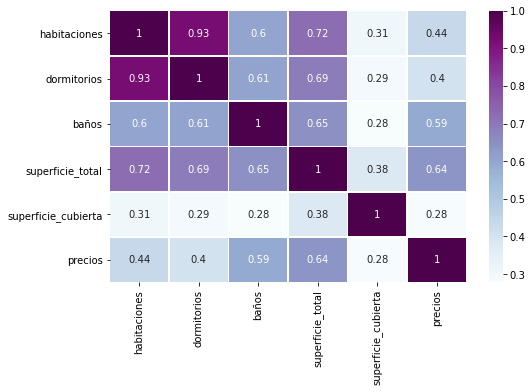

In [320]:
f, ax = plt.subplots(figsize=(8, 5))
corr = data_final.corr()
sns.heatmap(corr,annot=True,linewidths=.5,cmap="BuPu")

En este heatmap se puede observar que los atributos que poseen mayor correlación con la variable precio son:
<ol>
  <li>Superficie total.</li>
  <li>Baños.</li>
</ol>

Por otro lado, la variable Baños es uno de los atributos que más valores nulos posee, por lo tanto intentaremos imputarla para mejorar la predicción de nuestro modelo. Tambien analizaremos la relacion entre Habitaciones y Baños para identificar si existe alguna relacion de dependencia entre ellos.

In [321]:
data_final.baños.isnull().groupby([data_final['habitaciones']]).sum().astype(int).reset_index(name='Nulos')


,habitaciones,Nulos
0,1.0,116
1,2.0,296
2,3.0,252
3,4.0,110
4,5.0,85
5,6.0,12
6,7.0,5
7,8.0,3
8,9.0,0
9,10.0,1


A traves de este análisis se puede observar que los valores nulos de baños, se presentan en mayor cantidad en aquellos inmuebles que poseen menor cantidad de habitaciones.

La razón de que existan una grande cantidad de valores faltantes en los inmuebles que presentan menor cantidad de habitaciones, debe ser porque en esos inmuebles se asume que poseen 1 baño y por eso el valor de la cantidad de baños esta faltante.

# Imputación de valores faltantes

En esta sección, analizaremos la mejor alternativa para las columnas con valores faltantes. Pero, primero recordemos que features tienen valores faltantes:

In [322]:
def missing_values_table(data_final):
        # Total missing values
        mis_val = data_final.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data_final.isnull().sum() / len(data_final)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [323]:
data_faltante= missing_values_table(data_final)
data_faltante

Your selected dataframe has 38 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
baños,880,1.1
superficie_cubierta,517,0.6


In [324]:
# Calculo el cuartil minimo y el cuarti maximo
minimo = data_final.quantile(0.25)
maximo = data_final.quantile(0.75)
#Calculo un Indice restando el cuartil maximo con el cuartil minimo
IQR = maximo-minimo

In [325]:
#genero una mascara que extraiga todos las instancias del dataset que esten por debajo del quartil minimo menos el coeficiente IQR  y por sobre el cuartil maximo mas el coeficiente IQR
data_final = data_final[~ ((data_final< (minimo - 1.5 * IQR)) | (data_final > (maximo + 1.5 * IQR))).any(axis=1)]

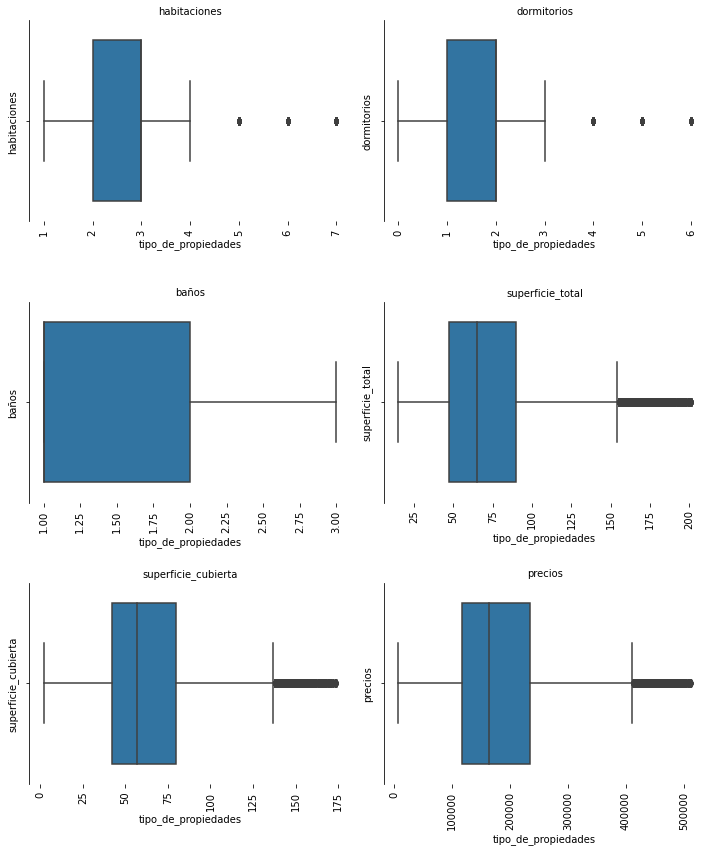

In [326]:
fig = plt.figure(figsize = (10, 15))
gs = fig.add_gridspec(4, 2)
atributos=data_final.drop(columns=['barrio','tipos_de_propiedades'])
fila=0
columna=0
for tipo in atributos:
    if tipo!='tipo_de_propiedades':
        ax = fig.add_subplot(gs[fila,columna])
        ax=sns.boxplot(tipo, data=data_final)
        plt.setp(ax.get_xticklabels(), rotation=90)
        titulo=tipo
        ax.set_title(titulo,fontsize=10)
        ax.tick_params(labelsize=10)
        ax.set_xlabel("tipo_de_propiedades",fontsize=10)
        ax.set_ylabel(tipo,fontsize=10)
        
        if columna<1:
            columna=columna+1
        else:
            columna=0
            fila=fila+1
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

In [327]:
data_final.isna().sum()

habitaciones              0
dormitorios               0
baños                   775
superficie_total          0
superficie_cubierta     470
precios                   0
barrio                    0
tipos_de_propiedades      0
dtype: int64

A través de esta técnica, logramos reducir un poco la cantidad de valores faltantes en ambas variables. Ahora procederemos a imputar los valores faltantes.

## ENCODING

A continuación, vamos a codificar numéricamente. Se decidió utilizar la librería get_dummies de pandas, para pasar cada valor de cada variable categórico de las columnas "Barrio" y "Tipo de propiedades" a nuevas columnas y representarlo con un valor dummie (1) o (0).

In [328]:
data_dummies = pd.get_dummies (data_final, columns = ['tipos_de_propiedades','barrio'])

In [329]:
data_dummies.head()

,habitaciones,dormitorios,baños,superficie_total,superficie_cubierta,precios,tipos_de_propiedades_Casa,tipos_de_propiedades_Departamento,tipos_de_propiedades_PH,barrio_Abasto,...,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
lista_barrio_prop =data_dummies.drop(columns=['habitaciones','dormitorios','baños', 'superficie_total','superficie_cubierta','precios',])

In [331]:
#Lista de todos los barrios que componian la variable "Barrio" y los tipos de propiedades
list(lista_barrio_prop)

['tipos_de_propiedades_Casa',
 'tipos_de_propiedades_Departamento',
 'tipos_de_propiedades_PH',
 'barrio_Abasto',
 'barrio_Agronomía',
 'barrio_Almagro',
 'barrio_Balvanera',
 'barrio_Barracas',
 'barrio_Barrio Norte',
 'barrio_Belgrano',
 'barrio_Boca',
 'barrio_Boedo',
 'barrio_Caballito',
 'barrio_Catalinas',
 'barrio_Centro / Microcentro',
 'barrio_Chacarita',
 'barrio_Coghlan',
 'barrio_Colegiales',
 'barrio_Congreso',
 'barrio_Constitución',
 'barrio_Flores',
 'barrio_Floresta',
 'barrio_Las Cañitas',
 'barrio_Liniers',
 'barrio_Mataderos',
 'barrio_Monserrat',
 'barrio_Monte Castro',
 'barrio_Nuñez',
 'barrio_Once',
 'barrio_Palermo',
 'barrio_Parque Avellaneda',
 'barrio_Parque Centenario',
 'barrio_Parque Chacabuco',
 'barrio_Parque Chas',
 'barrio_Parque Patricios',
 'barrio_Paternal',
 'barrio_Pompeya',
 'barrio_Puerto Madero',
 'barrio_Recoleta',
 'barrio_Retiro',
 'barrio_Saavedra',
 'barrio_San Cristobal',
 'barrio_San Nicolás',
 'barrio_San Telmo',
 'barrio_Tribunales',


## Imputación de valores faltantes

In [332]:
%%time
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.fit(data_dummies)
data_filled = imputer.transform(data_dummies)

CPU times: user 16.2 s, sys: 2.44 s, total: 18.7 s
Wall time: 16.3 s


In [333]:
data_filled=pd.DataFrame(data_filled,columns=data_dummies.columns)

In [334]:
data_filled.isnull().sum()

habitaciones               0
dormitorios                0
baños                      0
superficie_total           0
superficie_cubierta        0
                          ..
barrio_Villa Riachuelo     0
barrio_Villa Santa Rita    0
barrio_Villa Soldati       0
barrio_Villa Urquiza       0
barrio_Villa del Parque    0
Length: 66, dtype: int64

### Conclusión

Podemos observar que ya no hay más valores faltantes en nuestro dataset. 

## Escalamiento de datos

In [335]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

In [336]:
# Separo features y target para MinMax
X_for_scaler = data_filled.drop('precios', axis=1)
y_precio = data_filled['precios']

In [337]:
# MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(X_for_scaler)

MinMaxScaler()

In [338]:
X_scaled = scaler.transform(X_for_scaler)
scaled_df = pd.DataFrame(X_scaled, index=X_for_scaler.index, columns=X_for_scaler.columns)

In [339]:
#  Dataset con escalamiento para hacer PCA 

scaled_features_df = scaled_df

## Reducción de Dimensionalidad - PCA

Definimos los valores de X e Y que utilizaremos para la evaluación del modelo

In [345]:
X1 = scaled_df[['superficie_total','superficie_cubierta','baños']].values.T
X=np.vstack((X1)).T
y = data_filled['precios'].values

In [346]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_nuevo = pca.fit_transform(X)

## Modelo - Proyecto N 1

Ahora implementaremos el modelo que utilizamos en el proyecto 1 utilizando PCA y analizaremos si la predicción del mismo mejoró.

***Elección de modelos***

In [348]:
from sklearn.metrics import mean_squared_error, r2_score

In [349]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

In [350]:
from sklearn.tree import DecisionTreeRegressor

clf_tree = DecisionTreeRegressor()

In [351]:
clf_tree.fit(X_train, y_train)

DecisionTreeRegressor()

***Optimización de Párametros para árbol de decisión***

In [352]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = mean_squared_error(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = mean_squared_error(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

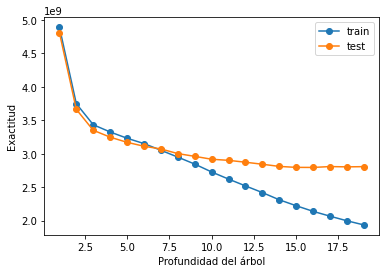

In [353]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

En este gráfico se puede observar la variación de la exactitud dependiendo de la profundidad del árbol utilizada en el modelo entre el conjunto de entrenamiento y el conjunto de prueba. En función a este gráfico, utilizaremos una profundidad de 7 para el modelo ya que corresponde a aquel punto donde la exactitud entre el conjunto de entrenamiento y el conjunto de prueba es casi identica.

In [354]:
clf_tree_best = DecisionTreeRegressor(max_depth = 7)

clf_tree_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [355]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [356]:
y_test_pred = clf_tree_best.predict(X_test)

mean_squared_error(y_test, y_test_pred)

3070675032.5015507

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 55238.93776877463
Raíz del error cuadrático medio en Test: 55413.67189152467


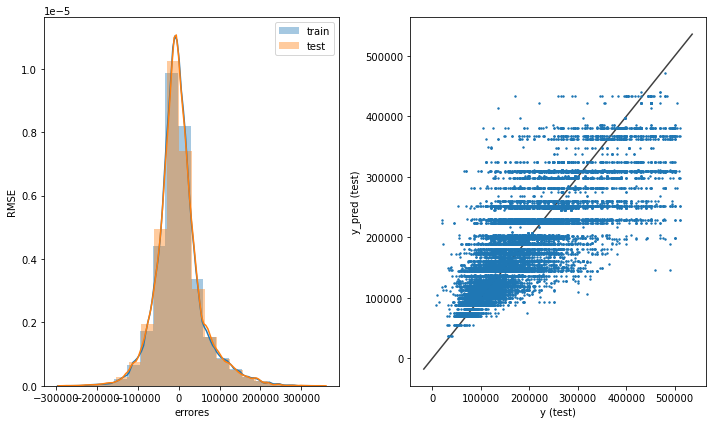

In [357]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión']

for i, model in enumerate([clf_tree_best]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.ylabel('RMSE')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Luego de haber filtrado nuestro dataset junto con el manejo de outliers, encoding, escalamiento de datos y una reducción de dimensionalidad de los datos, podemos determinar que el modelo que fue implementado en el proyecto 1 ahora predice mejor ya que el RMSE del proyecto 1 fue de 209760 y ahora es de 55414, es decir, el error del modelo se redujo notablemente por lo que el modelo ahora predice mejor y es mucho más eficiente.

---

## Parte B - Modelos Avanzados

A continuación, probaremos la aplicación de la técnica regresión polinómica, ya que incrementando el grado del polinomio podremos lograr una mejor prediccón. También, aplicaremos la técnica Random Forest para comparar cual de estos 2 modelos avanzandos predice mejor.

Por último, aplicaremos la técnica validación cruzada para poder garantizar que los resultados del modelo sean independientes de la partición entre test y train y Random Search para la optimización de los hiperparametros del modelo.

In [358]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

In [360]:
clf_train_scores_mean = []
clf_train_scores_std = []
clf_test_scores_mean = []
clf_test_scores_std = []

profundidades = np.arange(1,5)

for profundidad in profundidades:
 
    # Generamos nueva matriz de features aplicando "Polinomeal Features"
    
    poly = PolynomialFeatures(degree = profundidad, include_bias=True)
    X_train_new = poly.fit_transform(X_train)
    X_test_new = poly.fit_transform(X_test)
    
    # Ejecutamos el modelo con el nuevo sets de features 
    
    reg_lin = LinearRegression()
    reg_lin.fit(X_train_new, y_train)
    y_train_pred_2 = reg_lin.predict(X_train_new)
    y_test_pred_2 = reg_lin.predict(X_test_new)
    
    # Aplicamos validacion cruzada
    clf_scores = cross_validate(reg_lin, X_test_new, y_test, cv=6, return_train_score=True, n_jobs = -1)
 
    clf_train_scores_mean.append(clf_scores['train_score'].mean())
    clf_train_scores_std.append(clf_scores['train_score'].std())
    
    clf_test_scores_mean.append(clf_scores['test_score'].mean())
    clf_test_scores_std.append(clf_scores['test_score'].std())

clf_train_scores_mean = np.array(clf_train_scores_mean)
clf_train_scores_std = np.array(clf_train_scores_std)
clf_test_scores_mean = np.array(clf_test_scores_mean)
clf_test_scores_std = np.array(clf_test_scores_std)

## Graficamos

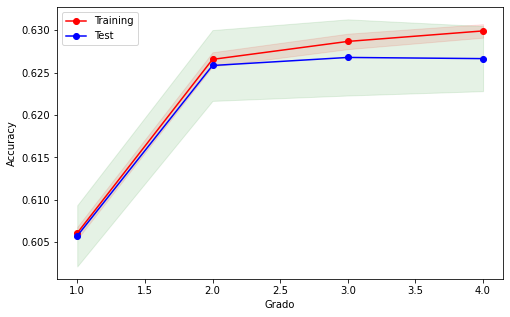

In [361]:
plt.figure(figsize=(8,5))
plt.fill_between(profundidades, clf_train_scores_mean - clf_train_scores_std,
clf_train_scores_mean + clf_train_scores_std, alpha=0.1,color="r")
plt.fill_between(profundidades, clf_test_scores_mean - clf_test_scores_std,clf_test_scores_mean + clf_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, clf_train_scores_mean, 'o-' ,color="r" ,label="Training")
plt.plot(profundidades, clf_test_scores_mean, 'o-' ,color="b" ,label="Test")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Grado')
plt.show()

En este gráfico se puede observar la variación de la exactitud dependiendo del grado del polinomio utilizado en el modelo entre el conjunto de entrenamiento y el conjunto de prueba. En función a este gráfico, utilizaremos un polinomio de grado 2 para el modelo ya que corresponde a aquel punto donde la exactitud entre el conjunto de entrenamiento y el conjunto de prueba es casi identica.

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

In [363]:
poly = PolynomialFeatures(degree =2, include_bias=True)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

In [364]:
reg_lin = LinearRegression()
reg_lin.fit(X_train_new, y_train)
y_train_pred = reg_lin.predict(X_train_new)
y_test_pred = reg_lin.predict(X_test_new)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 57131.765250190605
Raíz del error cuadrático medio en Test: 56499.77639842757


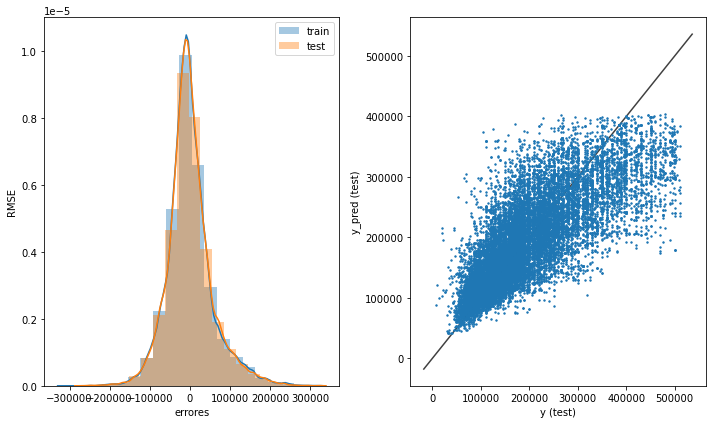

In [365]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión']

for i, model in enumerate([reg_lin]):
    y_train_pred = model.predict(X_train_new)
    y_test_pred = model.predict(X_test_new)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.ylabel('RMSE')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

RMSE obtenido a traves de la implementación del modelo regresión polinómica fue de 56499.

A continuación, probaremos la técnica Random Forest para analizar que modelo predice mejor. 

## Random Forest

In [366]:
from sklearn.ensemble import RandomForestClassifier

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

In [368]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
X, y = make_regression(n_features=3, n_informative=2,
                       random_state=0, shuffle=False)

In [369]:
from sklearn.model_selection import cross_validate
clf_train_scores_mean = []
clf_train_scores_std = []
clf_test_scores_mean = []
clf_test_scores_std = []

profundidades = np.arange(1,10,1)

for profundidad in profundidades:
 
    clf = RandomForestRegressor( max_depth=profundidad, random_state=42)
    clf_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    clf_train_scores_mean.append(clf_scores['train_score'].mean())
    clf_train_scores_std.append(clf_scores['train_score'].std())
    
    clf_test_scores_mean.append(clf_scores['test_score'].mean())
    clf_test_scores_std.append(clf_scores['test_score'].std())

clf_train_scores_mean = np.array(clf_train_scores_mean)
clf_train_scores_std = np.array(clf_train_scores_std)
clf_test_scores_mean = np.array(clf_test_scores_mean)
clf_test_scores_std = np.array(clf_test_scores_std)

### Graficamos

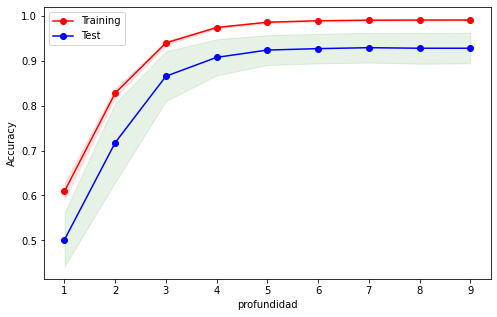

In [370]:
plt.figure(figsize=(8,5))
plt.fill_between(profundidades, clf_train_scores_mean - clf_train_scores_std,
clf_train_scores_mean + clf_train_scores_std, alpha=0.1,color="r")
plt.fill_between(profundidades, clf_test_scores_mean - clf_test_scores_std,clf_test_scores_mean + clf_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, clf_train_scores_mean, 'o-', color="r",label="Training")
plt.plot(profundidades, clf_test_scores_mean, 'o-', color="b",label="Test")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('profundidad')
plt.show()

En este gráfico se puede observar la variación de la exactitud dependiendo de la profundidad utilizada en el modelo entre el conjunto de entrenamiento y el conjunto de prueba. En función a este gráfico, utilizaremos una profundidad de 6 para el modelo ya que corresponde a aquel punto donde la exactitud entre el conjunto de entrenamiento y el conjunto de prueba es más parecida.

In [393]:
clf = RandomForestRegressor( max_depth=6, random_state=42)
clf_scores = cross_val_score(clf, X, y, cv=7)
print("Accuracy para Random Forest: %0.2f (+/- %0.2f)" % (clf_scores.mean(), clf_scores.std() * 2))

Accuracy para Random Forest: 0.92 (+/- 0.09)


Podemos determinar a traves del Accuracy que este modelo posee una mejor performance que el modelo regresión polinómica. 

Acontinuación evaluaremos el modelo sin la optimización de parametros

In [373]:
clf_rfr = RandomForestRegressor( max_depth=6, random_state=42)

In [374]:
clf_rfr.fit(X_train, y_train)
y_train_pred = clf_rfr.predict(X_train)
y_test_pred = clf_rfr.predict(X_test)

Modelo: Random Forest
Raíz del error cuadrático medio en Train: 55555.70906814315
Raíz del error cuadrático medio en Test: 55248.81959154044


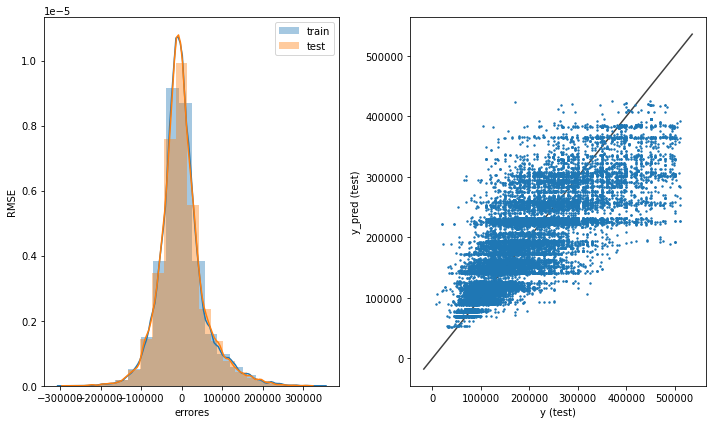

In [375]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Random Forest']

for i, model in enumerate([clf_rfr]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.ylabel('RMSE')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()



Una vez analizado el RMSE llegamos a la conclusión de que el modelo cuyo desempeño fue mejor es el de Random Forest.

Aunque el RMSE se haya disminuido en el modelo de regresión polinómica en comparación al modelo implementado en el proyecto 1, el modelo de Random Forest nos da un mejor resultado que el anterior, lo que significa que la eficiencia del modelo es mejor que la de la regresión polinómica. 

A continuación, optimizaremos los hiperparametros para analizar si la predicción del modelo Random Forest puede mejorar.

## Random Search


In [376]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint 
rf= RandomForestRegressor()

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [377]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 110, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 5, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [378]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


{'n_estimators': 107,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

Ahora, implementaremos el modelo con los hiperparametros que nos propone el Random Search.

<ol>
        <li>N de estimators: 107</li>
        <li>min samples split: 10</li>
        <li>min samples leaf: 1</li>
        <li>max features: sqrt</li>
        <li>max depth: None</li>
        <li>Bootstrap: True</li>
</ol>




In [379]:
clf_rfr = RandomForestRegressor( n_estimators=107,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=None,bootstrap=True)

In [380]:
clf_rfr.fit(X_train, y_train)
y_train_pred = clf_rfr.predict(X_train)
y_test_pred = clf_rfr.predict(X_test)

Modelo: Random Forest despues de optimizar los hipermarametros
Raíz del error cuadrático medio en Train: 44082.72571695945
Raíz del error cuadrático medio en Test: 50161.64861989737


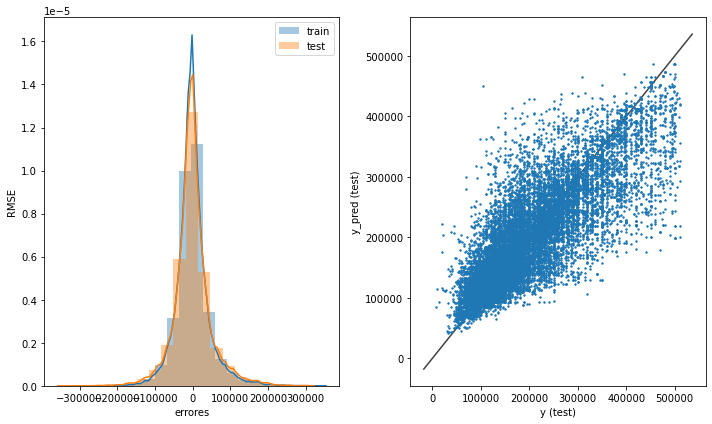

In [381]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Random Forest despues de optimizar los hipermarametros']

for i, model in enumerate([clf_rfr]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.ylabel('RMSE')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

A través de la optimización de los hiperparametros, queda demostrado que la performance del random forest ha mejorado, reduciendo asi el RMSE. Si bien es una mejora leve, a partir de la utilización de los parametros que nos propuso el random search, la predicción del modelo mejoró.

---

# Interpretacion de Modelos


***¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no?***

Podemos determinar que las variables que fueron mas importantes para el modelo fueron:

<ol>
        <li>Superficie Total</li>
        <li>Superficie Cubierta</li>
        <li>Baños</li>
</ol>

Estos resultados tienen sentido ya que estas 3 variables son las más importantes a la hora de definir el precio de un inmueble.



***¿Dónde falla el modelo?***


Por otro lado, el modelo falla cuando debe predecir propiedades cuyo monto son muy grandes. Esto se puede demostrar a traves del análisis de las distribuciones de las variables.

### A continuación, utilizaremos la formula de intercuartiles para establecer valores mínimos y máximos en los diferentes features

In [384]:
#Habitaciones
q25,q75 = np.percentile(data_final.habitaciones.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data_filtrada.habitaciones < minimo
mascara_outliers = (data_final.habitaciones < minimo) | (data_final.habitaciones > maximo)
print("Habitaciones -- "," --  Q25: ",q25," Q75: ",q75," IQR: ",iqr," MIN: ", minimo," MAX: ", maximo, " Registros eliminados: ",mascara_outliers.sum())

#Baños
q25,q75 = np.percentile(data_final.baños.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data_filtrada.baños < minimo
mascara_outliers = (data_final.baños < minimo) | (data_final.baños > maximo)
print("Baños -- "," --  Q25: ",q25," Q75: ",q75," IQR: ",iqr," MIN: ", minimo," MAX: ", maximo, " Registros eliminados: ",mascara_outliers.sum())


#Superficie total
q25,q75 = np.percentile(data_final.superficie_total.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data_filtrada.superficie_total < minimo
mascara_outliers = (data_final.superficie_total < minimo) | (data_final.superficie_total > maximo)
print("Superficie total  --  "," --  Q25: ",q25," Q75: ",q75," IQR: ",iqr," MIN: ", minimo," MAX: ", maximo, " Registros eliminados: ",mascara_outliers.sum())

#Superficie Cubierta
q25,q75 = np.percentile(data_final.superficie_cubierta.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data_filtrada.superficie_cubierta < minimo
mascara_outliers = (data_final.superficie_cubierta < minimo) | (data_final.superficie_cubierta > maximo)
print("Superficie Cubierta  --  "," --  Q25: ",q25," Q75: ",q75," IQR: ",iqr," MIN: ", minimo," MAX: ", maximo, " Registros eliminados: ",mascara_outliers.sum())

#Precio
q25,q75 = np.percentile(data_final.precios.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data_filtrada.precios < minimo
mascara_outliers = (data_final.precios < minimo) | (data_final.precios > maximo)
print("Precios          "," --  Q25: ",q25," Q75: ",q75," IQR: ",iqr," MIN: ", minimo," MAX: ", maximo, " Registros eliminados: ",mascara_outliers.sum())


Habitaciones --   --  Q25:  2.0  Q75:  3.0  IQR:  1.0  MIN:  0.5  MAX:  4.5  Registros eliminados:  2829
Baños --   --  Q25:  nan  Q75:  nan  IQR:  nan  MIN:  nan  MAX:  nan  Registros eliminados:  0
Superficie total  --    --  Q25:  47.0  Q75:  90.0  IQR:  43.0  MIN:  -17.5  MAX:  154.5  Registros eliminados:  2599
Superficie Cubierta  --    --  Q25:  nan  Q75:  nan  IQR:  nan  MIN:  nan  MAX:  nan  Registros eliminados:  0
Precios            --  Q25:  118000.0  Q75:  235000.0  IQR:  117000.0  MIN:  -57500.0  MAX:  410500.0  Registros eliminados:  2287


## Graficamos los distintos features

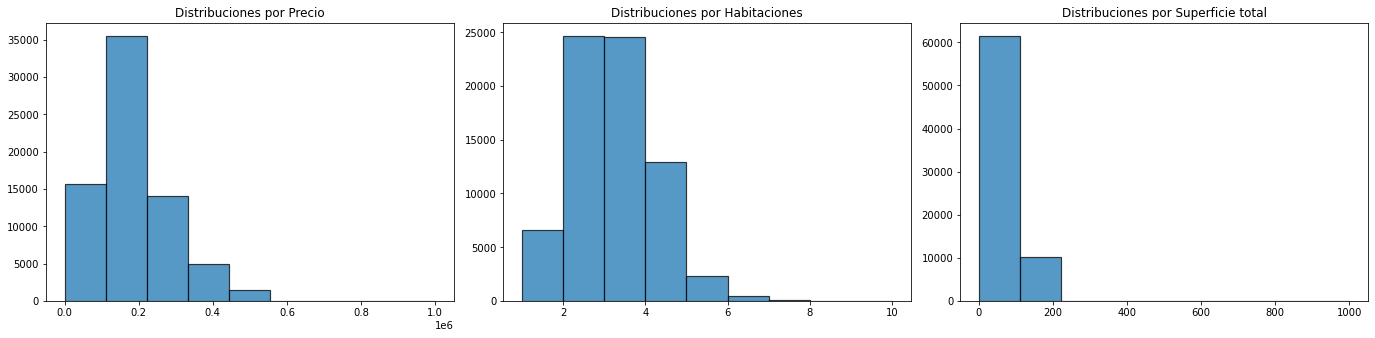

In [385]:
plt.figure(figsize = (6.4*3,4.8))
plt.subplot(1,3,1).set_title('Distribuciones por Precio')
plt.hist(data_final.precios, bins = np.linspace(0,1000000,10), alpha = 0.75, edgecolor='black', linewidth=1.2)
plt.subplot(1,3,2).set_title('Distribuciones por Habitaciones')
plt.hist(data_final.habitaciones, bins = np.linspace(1,10,10), alpha = 0.75, edgecolor='black', linewidth=1.2)
plt.subplot(1,3,3).set_title('Distribuciones por Superficie total')
plt.hist(data_final.superficie_total, bins = np.linspace(0,1000,10), alpha = 0.75, edgecolor='black', linewidth=1.2)
plt.tight_layout()
plt.show()

## Conclusiones

Precios: Podemos observar que el promedio de las propiedades se encuentran en valores que rondan entre los 118.000 y los 235.000. Además, pudimos identificar aquellas propiedades exclusivas cuyo valor ronda los 410.500.

Habitaciones: Podemos observar que el promedio de las propiedades tienen un promedio de 2 a 3 habitaciones. Además, pudimos identificar aquellas propiedades exclusivas de gran superficie tienen un maximos de 4.5 habitaciones.

Superficie Total: Podemos observar que el promedio de las propiedades tienen una superficie total que ronda los 47 y 90 mts2. Además, pudimos identificar aquellas propiedades exclusivas de gran superficie que tienen un maximo de 140 mts2.


---

***¿Que mejoraria?***

Queda demostrado que el dataset no aplica para propiedades de alto costo, por lo que deberíamos intentar conseguir más datos de las propiedades más costosas para tener más información y así poder lograr una mejor predicción de los mismos. 


En base a los errores de los modelos que fueron implementados, podemos determinar que el modelo que tuvo un mejor desempeño y menores errores fue el modelo de Random Forest. 

La regresión polinómica tuvo un RMSE de 56499, pero por el otro lado, el modelo Random Forest tuvo un RMSE sin la optimización de parametros de 55248 aunque la diferencia no haya sigo muy significativa demuestra que el random forest fue más eficiente que el anterior. Finalmente, una vez optimizados los hiperparametros se pudo demostrar que la predicción del Random Forest ha mejorado ya que el RMSE se redujo a 50120. 

***Conclusiones:***

Se demostró que un modelo de una regresión polinómica se comportó relativamente bien. Pero, por el otro lado, el modelo random Forest con sus hiperparametros optimizados presenta una mejoría por lo que entre ambos modelos, el de mejor performance seria el random Forest. 

Si bien ambos modelos fallan en las propiedades de alto costo, pero este es un punto a mejorar en nuestro dataset que se podría solucionar a traves de la busqueda de más propiedades costosas para obtener más datos. Pero por el otro lado, el Random Forest fue el modelo que mejor acertó la predicción de las propiedades que se encuentran en la media que corresponden a los inmuebles de los cuales poseemos más datos. 


---